In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import pickle

In [4]:
dataset=pd.read_csv("Housing.csv")
dataset.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
new_df=pd.read_csv("List_of_Districts_Tamil_Nadu.csv")
new_df.head()

,S. No.,Name of the District
0,1,ARIYALUR
1,2,CHENGALPATTU
2,3,CHENNAI
3,4,COIMBATORE
4,5,CUDDALORE


In [6]:
combine=pd.concat([dataset,new_df],axis=1)#combine two dataset 
df=combine
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,S. No.,Name of the District
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1.0,ARIYALUR
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,2.0,CHENGALPATTU
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,3.0,CHENNAI
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,4.0,COIMBATORE
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,5.0,CUDDALORE


Data Preprocessing (Cleaning & Transformation)

In [12]:
df.isnull().sum()

price                     0
area                      0
bedrooms                  0
bathrooms                 0
stories                   0
mainroad                  0
guestroom                 0
basement                  0
hotwaterheating           0
airconditioning           0
parking                   0
prefarea                  0
furnishingstatus          0
S. No.                  507
Name of the District    507
dtype: int64

In [13]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,S. No.,Name of the District
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1.0,ARIYALUR
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,2.0,CHENGALPATTU
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,3.0,CHENNAI
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,4.0,COIMBATORE
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,5.0,CUDDALORE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,NaN,NaN
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,NaN,NaN
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,NaN,NaN
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,NaN,NaN


In [15]:
df["Name of the District"]=df["Name of the District"].fillna(df["Name of the District"].mode()[0])

In [18]:
df.isnull().sum()

price                     0
area                      0
bedrooms                  0
bathrooms                 0
stories                   0
mainroad                  0
guestroom                 0
basement                  0
hotwaterheating           0
airconditioning           0
parking                   0
prefarea                  0
furnishingstatus          0
S. No.                  507
Name of the District      0
dtype: int64

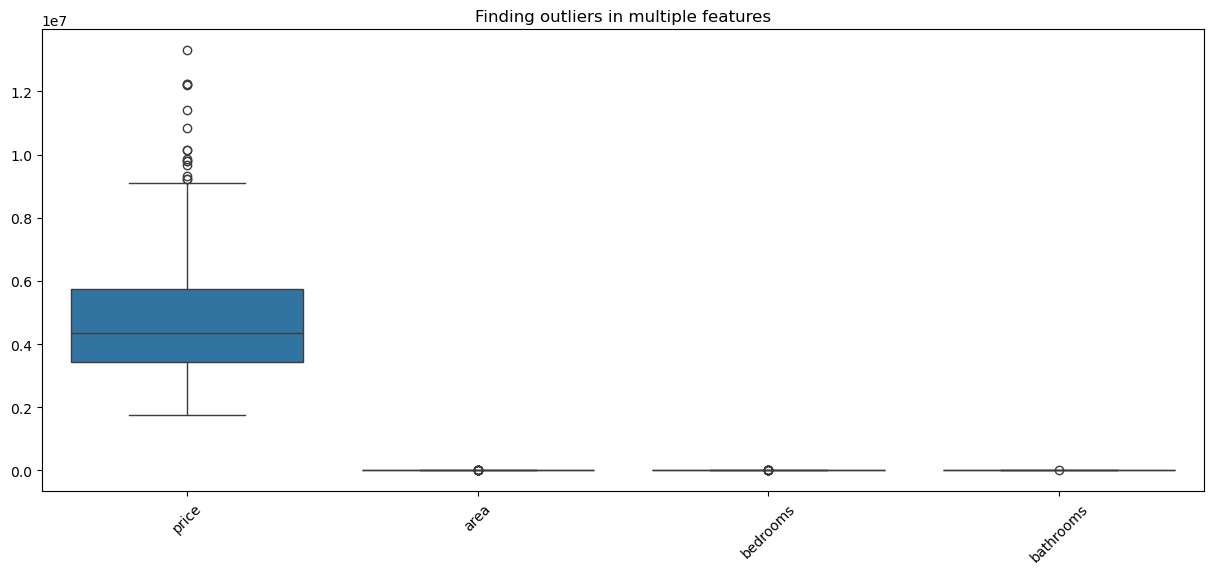

In [20]:
#finding outliers using visualization techniques
num_col=["price","area","bedrooms","bathrooms"]
#creating plot 
plt.figure(figsize=(15,6))
sns.boxplot(data=df[num_col])
plt.xticks(rotation=45)
plt.title("Finding outliers in multiple features")
plt.show()

In [21]:
#identify the outliers
def removing_outliers(df,columns): 
    for column in columns: 
       Q1=df[column].quantile(0.25)
       Q3=df[column].quantile(0.75)
       IQR=Q3-Q1
       lower_bound=Q1-1.5*IQR
       upper_bound=Q3+1.5*IQR
       df=df[(df[column]>=lower_bound)&(df[column]<=upper_bound)]
    return df

In [22]:
#Removing ooutliers 
features=["price","area","bedrooms","bathrooms"]
df_clened=removing_outliers(df,features)
#print("Dataset after dropping outliers",df_clened)
new_df=df_clened

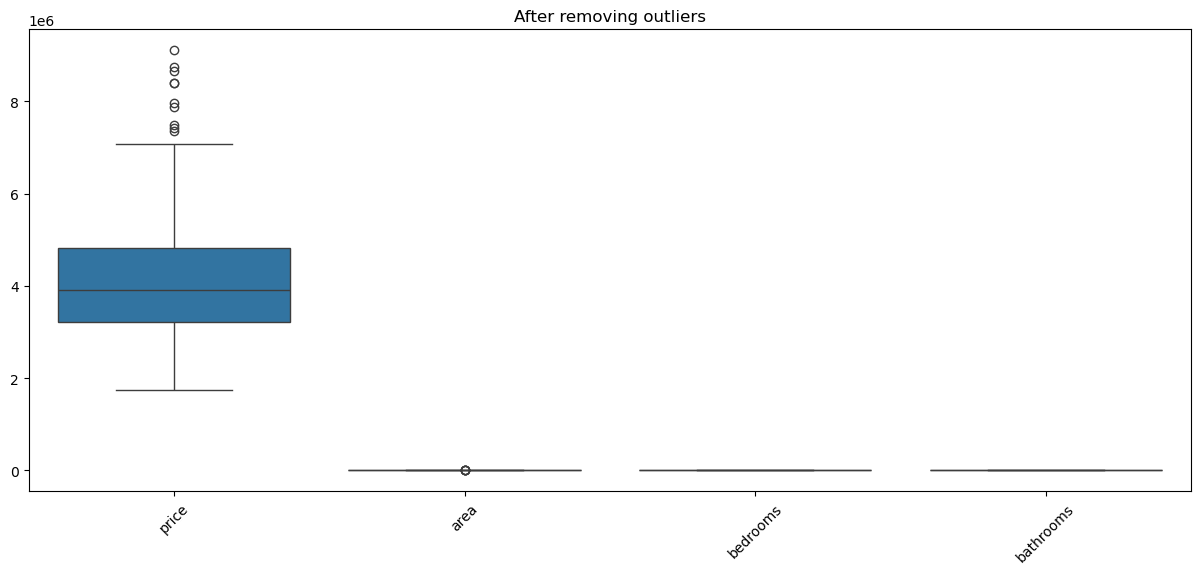

In [23]:
#After removing outliers 
num_col=["price","area","bedrooms","bathrooms"]
#creating plot 
plt.figure(figsize=(15,6))
sns.boxplot(data=new_df[num_col])
plt.xticks(rotation=45)
plt.title("After removing outliers")
plt.show()

In [27]:
#To  finding Duplicate value 
duplicate_val=new_df[new_df.duplicated()]
duplicate_val # no duplicate value in the data set 

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,S. No.,Name of the District


In [30]:
new_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,S. No.,Name of the District
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished,16.0,KANYAKUMARI
20,8750000,4320,3,1,2,yes,no,yes,yes,no,2,no,semi-furnished,21.0,RANIPET
22,8645000,8050,3,1,1,yes,yes,yes,no,yes,1,no,furnished,23.0,SIVAGANGAI
27,8400000,8875,3,1,1,yes,no,no,no,no,1,no,semi-furnished,28.0,THIRUVARUR
31,8400000,7000,3,1,4,yes,no,no,no,yes,2,no,semi-furnished,32.0,TIRUPATTUR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,NaN,ARIYALUR
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,NaN,ARIYALUR
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,NaN,ARIYALUR
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,NaN,ARIYALUR


In [32]:
#converting  categorical variables into numercial value (Label Encoding, One-Hot Encoding)
encoder=LabelEncoder()
df["Name of the District"]=encoder.fit_transform(df["Name of the District"])
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,S. No.,Name of the District
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1.0,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,2.0,1
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,3.0,2
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,4.0,3
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,5.0,4


 Exploratory Data Analysis (EDA)

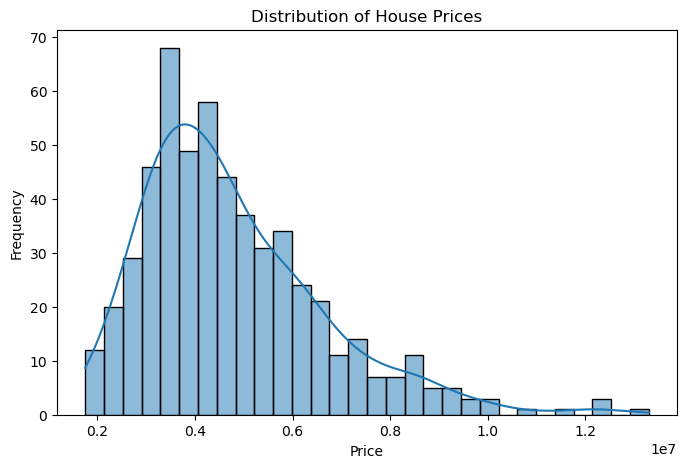

In [35]:

# Histogram of Prices
plt.figure(figsize=(8,5))
sns.histplot(df["price"], bins=30, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

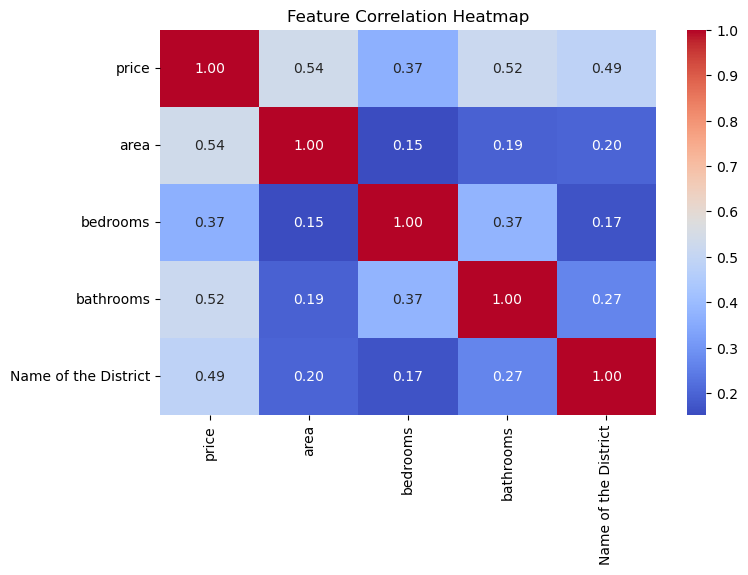

In [36]:
# Compute correlation matrix
correlation_matrix = df[["price","area", "bedrooms", "bathrooms","Name of the District"]].corr()

# Plot heatmap
plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


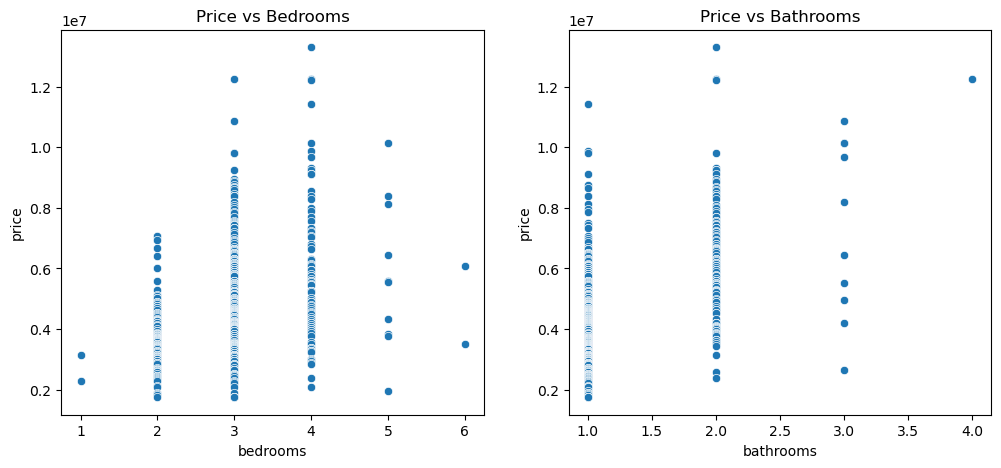

In [37]:
plt.figure(figsize=(12,5))

# Price vs Bedrooms
plt.subplot(1,2,1)
sns.scatterplot(x=df["bedrooms"], y=df["price"])
plt.title("Price vs Bedrooms")

# Price vs Bathrooms
plt.subplot(1,2,2)
sns.scatterplot(x=df["bathrooms"], y=df["price"])
plt.title("Price vs Bathrooms")

plt.show()


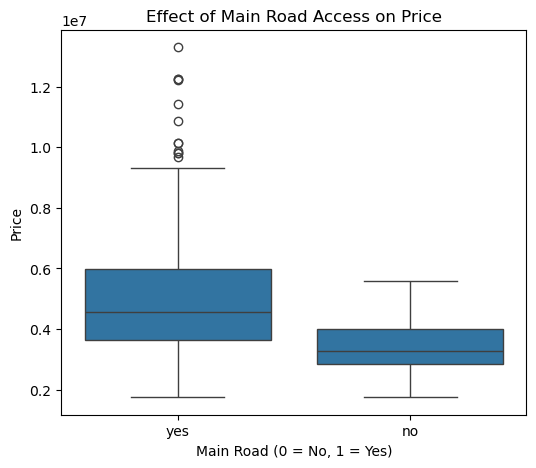

In [38]:
plt.figure(figsize=(6,5))
sns.boxplot(x=df["mainroad"], y=df["price"])
plt.title("Effect of Main Road Access on Price")
plt.xlabel("Main Road (0 = No, 1 = Yes)")
plt.ylabel("Price")
plt.show()

C:\Users\Vimal\AppData\Local\Temp\ipykernel_17084\2213456800.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df["Name of the District"], y=df["price"], ci=None)


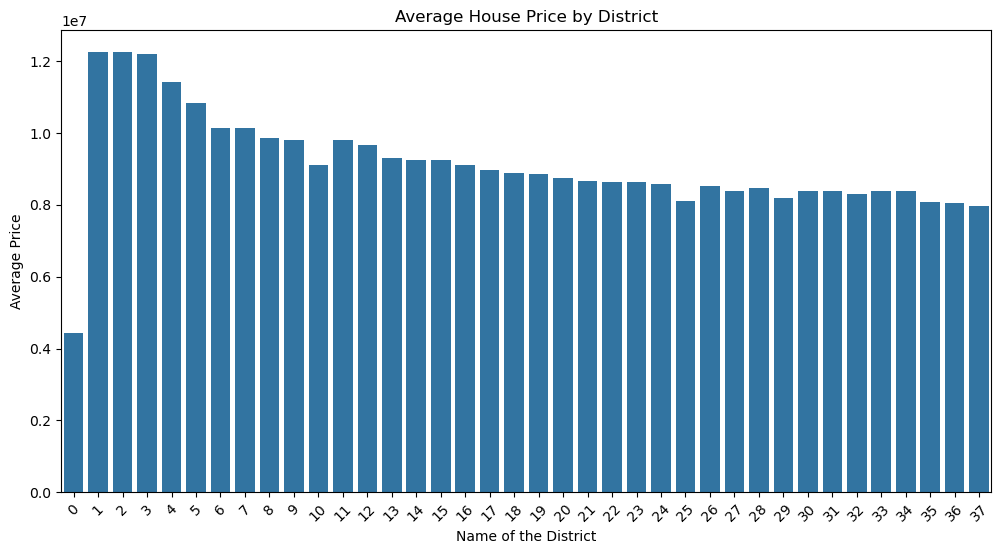

In [40]:
plt.figure(figsize=(12,6))
sns.barplot(x=df["Name of the District"], y=df["price"], ci=None)
plt.xticks(rotation=45)
plt.title("Average House Price by District")
plt.xlabel("Name of the District")
plt.ylabel("Average Price")
plt.show()


Split Data into Training & Testing Sets

In [43]:
x=df[["area","bedrooms","bathrooms","Name of the District"]] #input feature
y=df["price"] # target feature

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=42) #spliting train data and testing data

Choose a Machine Learning Algorithm

In [47]:
Regression_model=LinearRegression() #selcting Linear_regression model for this project

In [48]:
Regression_model.fit(x_train,y_train) #Training the mkdel 

LinearRegression()

In [50]:

# Print model coefficients
print("Intercept:", Regression_model.intercept_)
print("Coefficients:", Regression_model.coef_)


Intercept: 190033.9835780952
Coefficients: [4.24263014e+02 1.45649491e+05 1.55948876e+06 1.66033523e+05]


In [51]:
# Make predictions using the regression model
y_pred = Regression_model.predict(x_test)

print("Actual Prices:", y_test.values[:5])  
print("Predicted Prices:", y_pred[:5])


Actual Prices: [4060000 6650000 3710000 6440000 2800000]
Predicted Prices: [6394761.25408724 6503669.5710949  3754844.30417921 4307786.28913541
 3866552.75449284]


In [52]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Model Evaluation Metrics:
Mean Absolute Error (MAE): 1037082.14
Mean Squared Error (MSE): 1990797917658.29
Root Mean Squared Error (RMSE): 1410956.38
R² Score: 0.4287


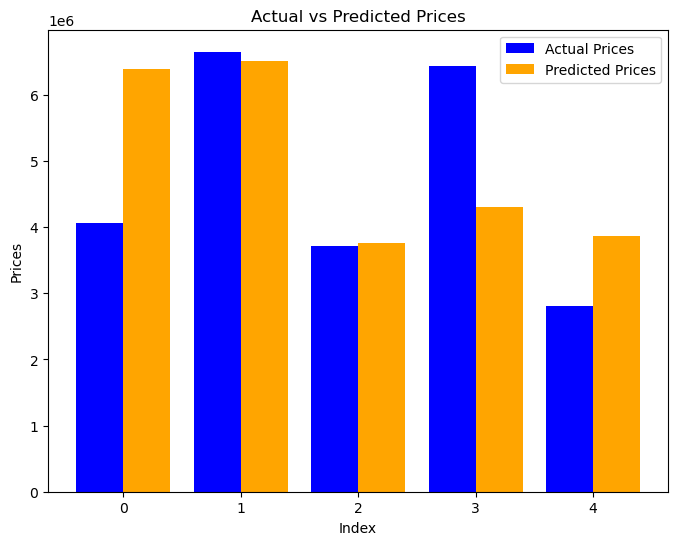

In [54]:
# Plot actual vs predicted prices
indices = np.arange(len(y_test[:5]))
plt.figure(figsize=(8, 6))
plt.bar(indices - 0.2, y_test.values[:5], 0.4, label='Actual Prices', color='blue')
plt.bar(indices + 0.2, y_pred[:5], 0.4, label='Predicted Prices', color='orange')
plt.xlabel('Index')
plt.ylabel('Prices')
plt.title('Actual vs Predicted Prices')
plt.xticks(indices) 
plt.legend()
plt.show()

MLOPS

In [72]:
pickle.dump(Regression_model,open("Hose_price_regression.pkl","wb"))

In [74]:
regression=pickle.load(open("Hose_price_regression.pkl","rb"))

In [76]:
regression.coef_

array([4.24263014e+02, 1.45649491e+05, 1.55948876e+06, 1.66033523e+05])